In [4]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

from glob import glob

from mapFunctions import getMap

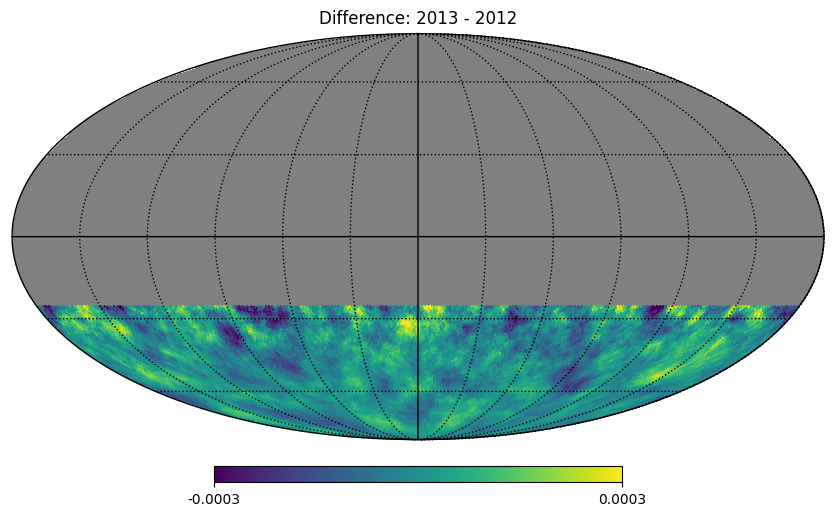

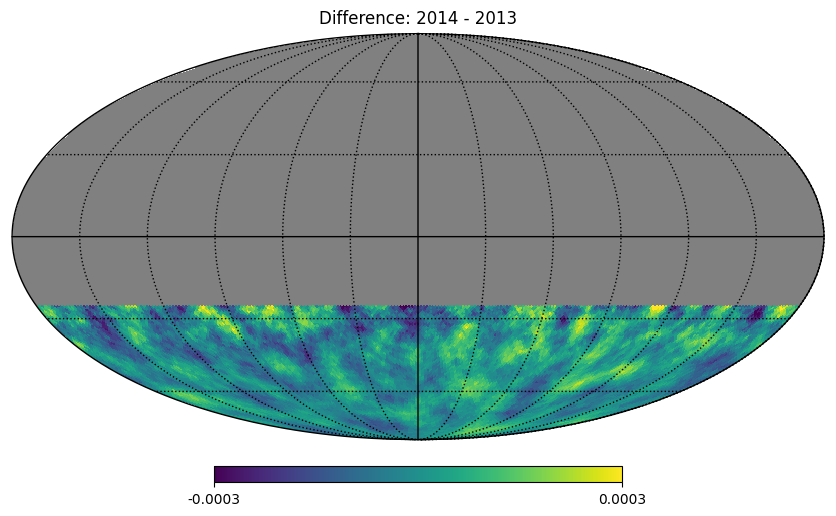

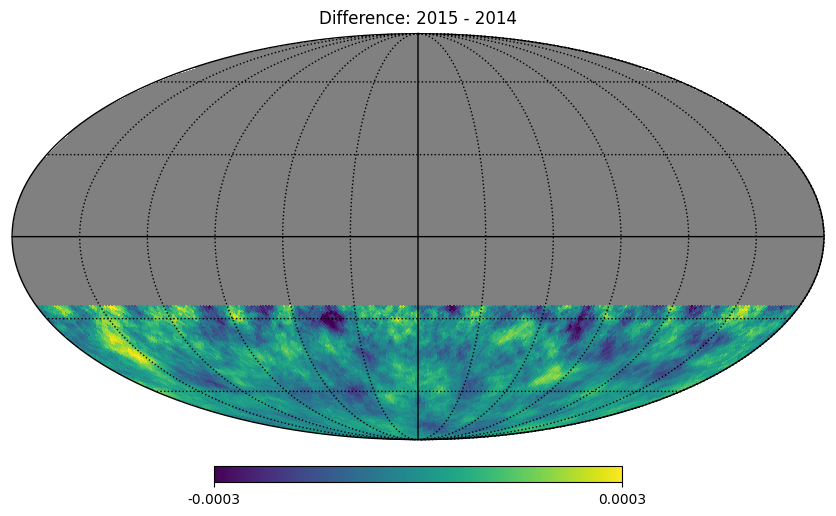

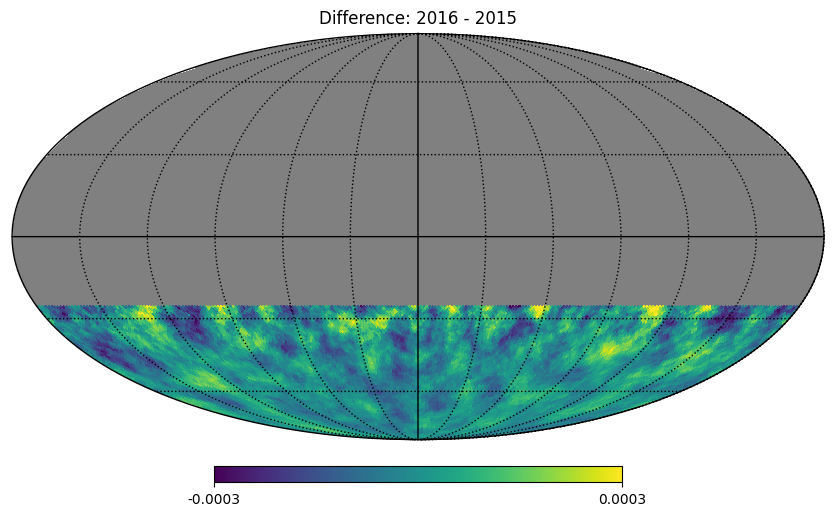

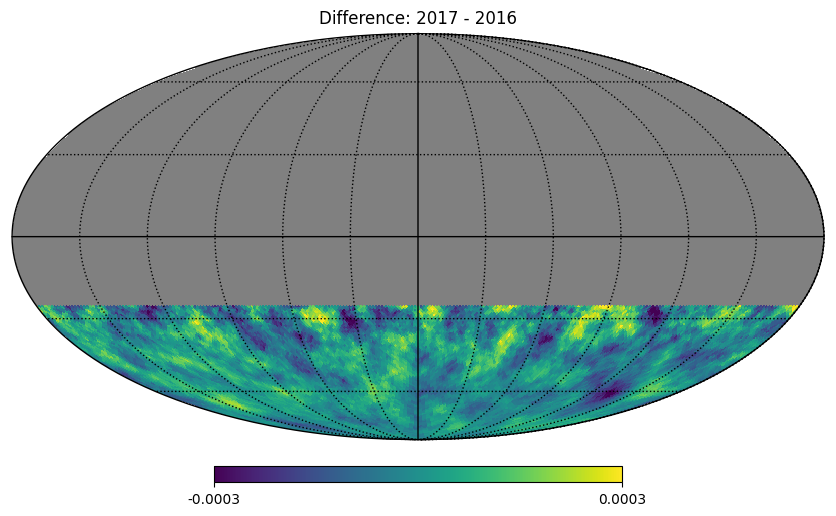

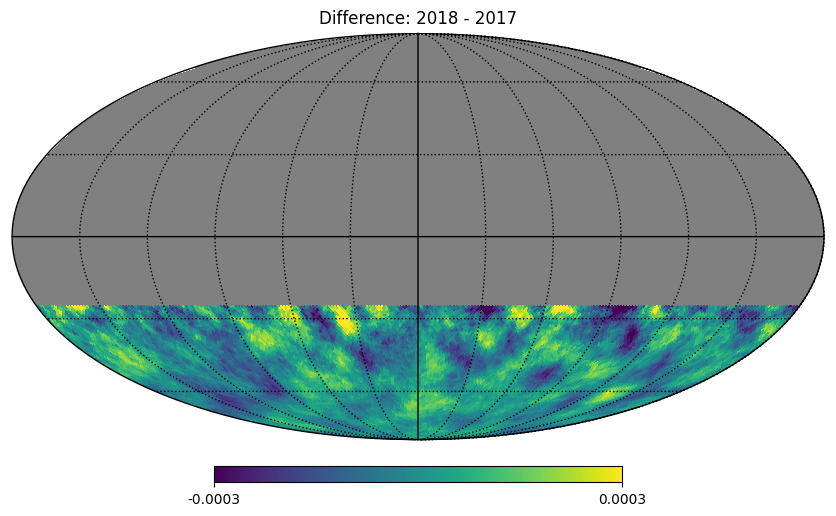

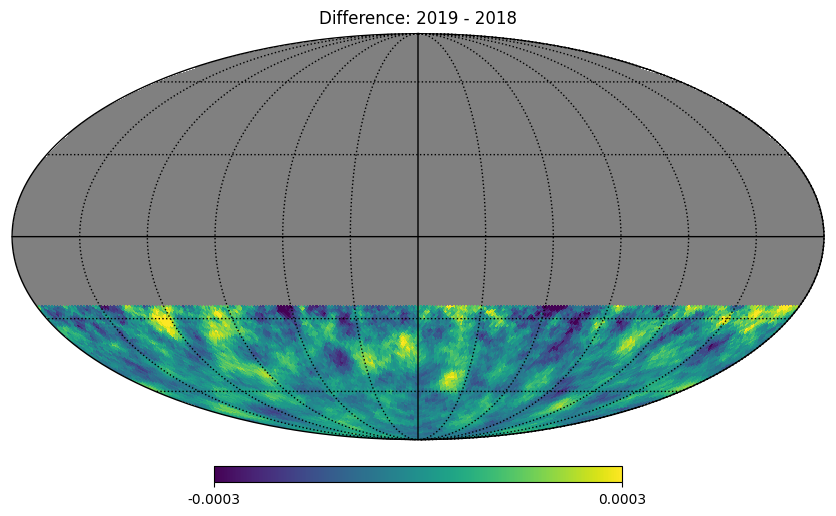

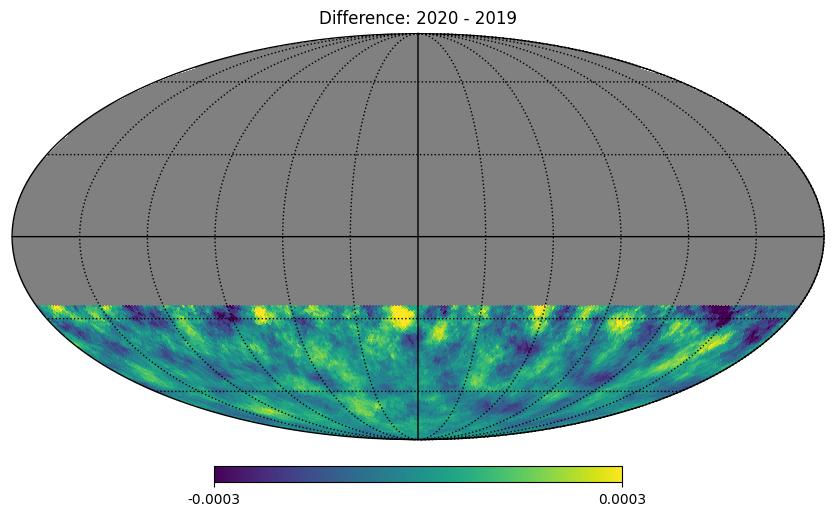

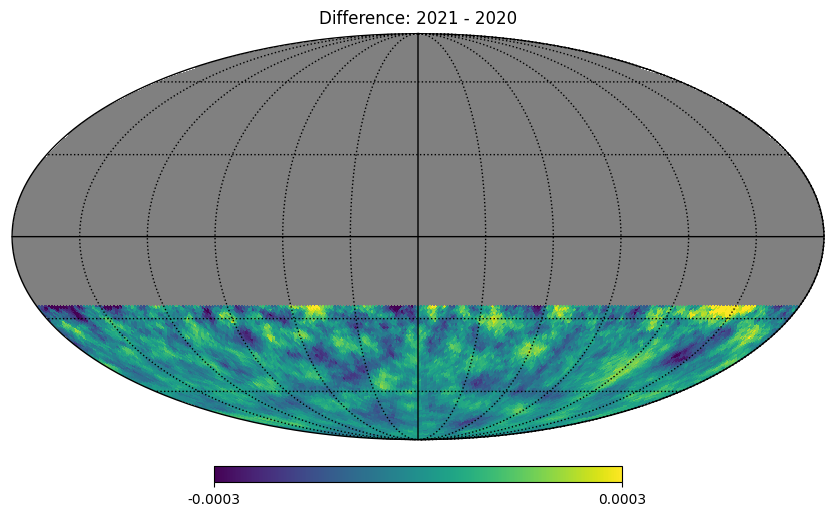

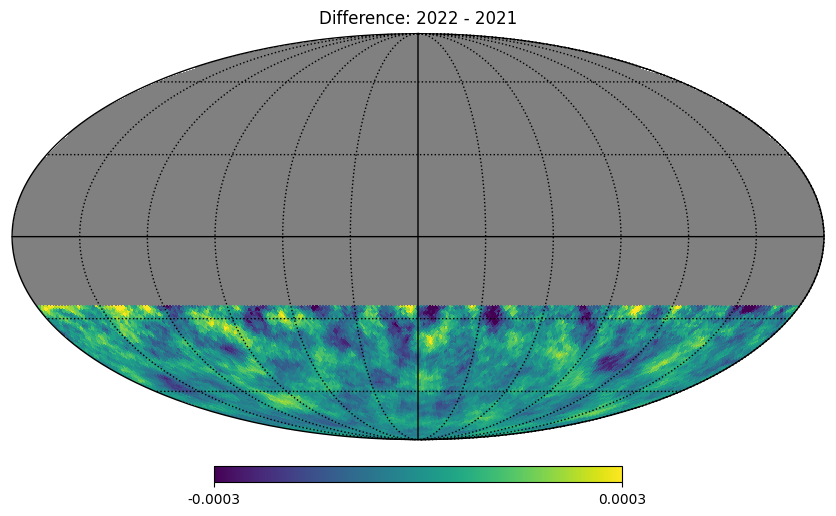

In [7]:
def compute_difference_maps(start_year=2012, end_year=2022):
    prev_map = None 

    for year in range(start_year, end_year + 1):
        summary_map = f'/data/user/fmcnally/anisotropy/maps/merged/IC86-{year}_N10_sid.fits'
        # current year
        current_map = getMap([summary_map], mapName='relint', smooth=5, verbose=False, mask=True )

        # if not the first year, calculate the difference
        if prev_map is not None:
            diff_map = current_map - prev_map
            diff_map[diff_map==0]=hp.UNSEEN
            hp.mollview(diff_map, min=-0.0003, max=0.0003, title=f'Difference: {year} - {year-1}')
            hp.graticule()
            plt.savefig(f'diff_{year}_{year-1}.png', dpi=200, bbox_inches='tight')
            plt.show()
        
        prev_map = current_map

compute_difference_maps()